In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import os
import json

In [3]:
optimal = {
    'berlin_modified': 4038,
    'berlin52': 7542,
    'kroA100': 21282,
    'kroA150': 26524,
    'fl417': 11861,
    'ali535': 202339,
    'gr666': 294358
}

## Test output (berlin_modified)

(0.0, 150.0)

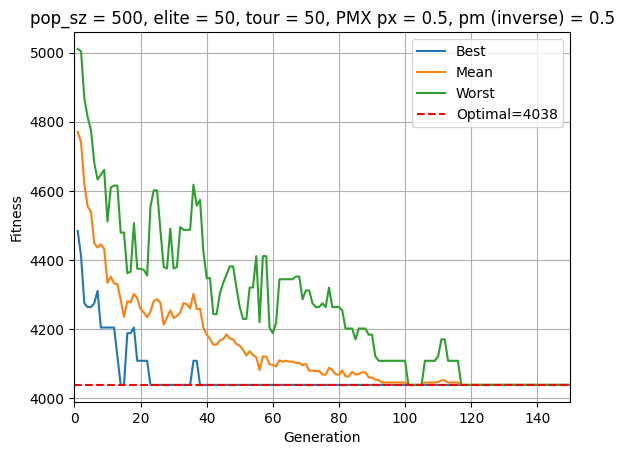

In [4]:
res_path = '../simulation_results/berlin_modified/aggregated/'
filepath = res_path + 'p500_esz50_tsz50_pxp-0.5_pmi-0.5_agg.csv'

df = pd.read_csv(
    filepath,
    sep=';',
    usecols=[0, 1, 2, 3],
    names=['generation', 'best', 'mean', 'worst'],
    header=None
)
plt.plot(df['generation'], df['best'], label=f'Best')
plt.plot(df['generation'], df['mean'], label=f'Mean')
plt.plot(df['generation'], df['worst'], label=f'Worst')

plt.axhline(optimal['berlin_modified'], color='r', linestyle='--', label='Optimal=4038')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right')
plt.title(f'pop_sz = 500, elite = 50, tour = 50, PMX px = 0.5, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, 150)

## PMX Crossover

#### PMX Crossover prob. tuning (berlin52)

(0.0, 3968.0)

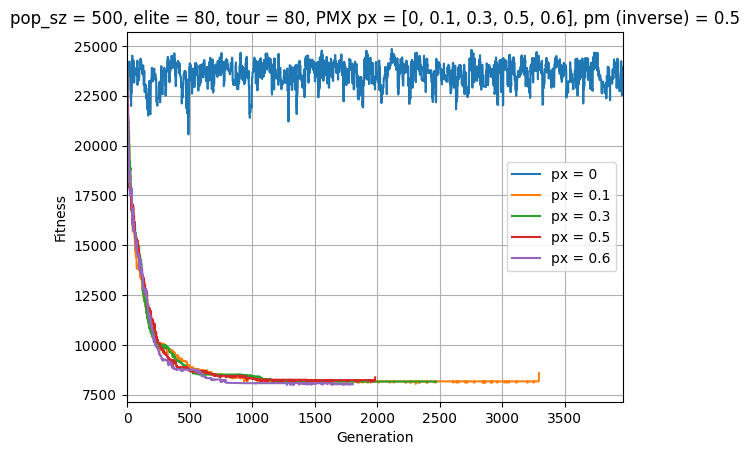

In [26]:
averaged_res_path = '../simulation_results/berlin52/aggregated/'
pxm_list = [0, 0.1, 0.3, 0.5, 0.6]

berlin52_best_fnames = []

gen_count_list = []
for param in pxm_list:
    filename = f'p500_esz80_tsz80_pxp-{param}_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 1],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['best'], label=f'px = {param}')
    gen_count_list.append(len(df['generation']))

# plt.axhline(y=optimal['berlin52'], color='r', linestyle='--', label='optimal')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='right')
plt.title(f'pop_sz = 500, elite = 80, tour = 80, PMX px = {pxm_list}, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))

Prawdopodobieństwo krzyżowania wynoszące px = 0.1 jest dużo lepsze niż wyłączenie funkcji krzyżowania w ogóle (px = 0).

#### Inverse mutation tuning (berlin52)

(0.0, 3329.0)

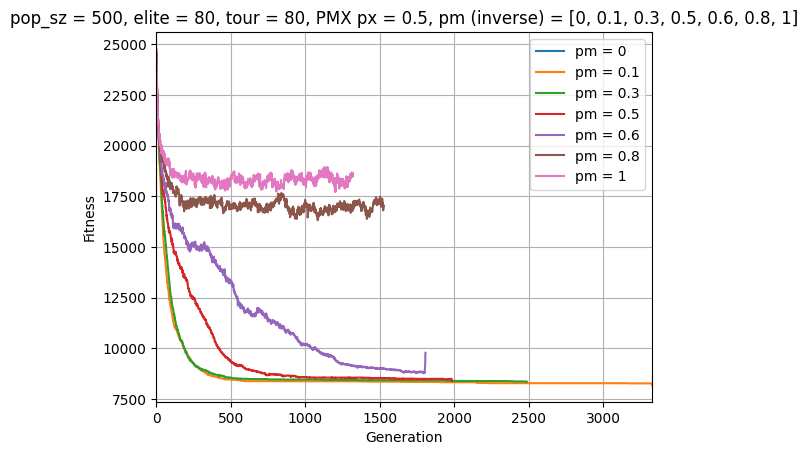

In [6]:
averaged_res_path = '../simulation_results/berlin52/aggregated/'
pmi_list = [0, 0.1, 0.3, 0.5, 0.6, 0.8, 1]

gen_count_list = []
for param in pmi_list:
    filename = f'p500_esz80_tsz80_pxp-0.5_pmi-{param}_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'pm = {param}')
    gen_count_list.append(len(df['generation']))

# plt.axhline(y=optimal['berlin52'], color='r', linestyle='--', label='optimal')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right')
plt.title(f'pop_sz = 500, elite = 80, tour = 80, PMX px = 0.5, pm (inverse) = {pmi_list}')
plt.grid()
plt.xlim(0, max(gen_count_list))
# plt.ylim(8250, 9250)

#### Swap mutation tuning (berlin52)

(0.0, 2858.0)

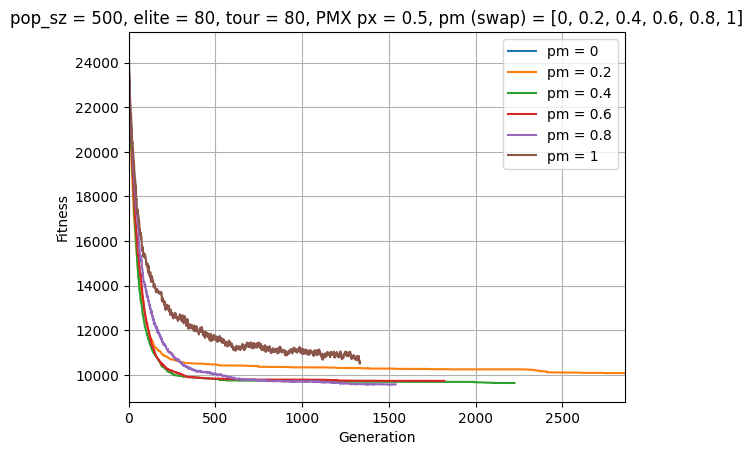

In [7]:
averaged_res_path = '../simulation_results/berlin52/aggregated/'
pms_list = [0, 0.2, 0.4, 0.6, 0.8, 1]

gen_count_list = []
for param in pms_list:
    filename = f'p500_esz80_tsz80_pxp-0.5_pms-{param}_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'pm = {param}')
    gen_count_list.append(len(df['generation']))

# plt.axhline(y=optimal['berlin52'], color='r', linestyle='--', label='optimal')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right')
plt.title(f'pop_sz = 500, elite = 80, tour = 80, PMX px = 0.5, pm (swap) = {pms_list}')
plt.grid()
plt.xlim(0, max(gen_count_list))
# plt.ylim(9500, 10200)

---

## OX crossover testing

#### Crossover prob. tuning (berlin52)

(0.0, 3296.0)

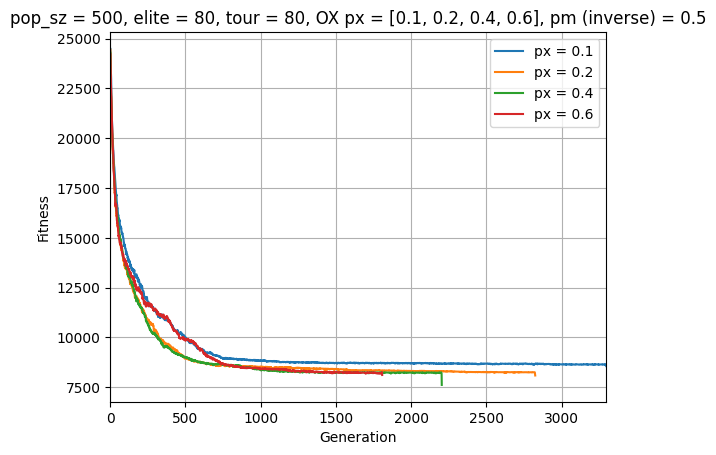

In [8]:
averaged_res_path = '../simulation_results/berlin52/aggregated/'
pmo_list = [0.1, 0.2, 0.4, 0.6]

gen_count_list = []
for param in pmo_list:
    filename = f'p500_esz80_tsz80_pxo-{param}_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'px = {param}')
    gen_count_list.append(len(df['generation']))

# plt.axhline(y=optimal['berlin52'], color='r', linestyle='--', label='optimal')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right')
plt.title(f'pop_sz = 500, elite = 80, tour = 80, OX px = {pmo_list}, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))
# plt.ylim(7500, 13000)

- Lepszym operatorem krzyżowania do tego momentu testowania wydaje się być *OX* z mutacją *inverse*.
- (?) Operator krzyżowania (OX lub PMX) z reguły źle działa w przypadku px > 0.5

---

## Dobór parametru *elite*

#### Tour = 1, elite tuning (berlin52)

(0.0, 2213.0)

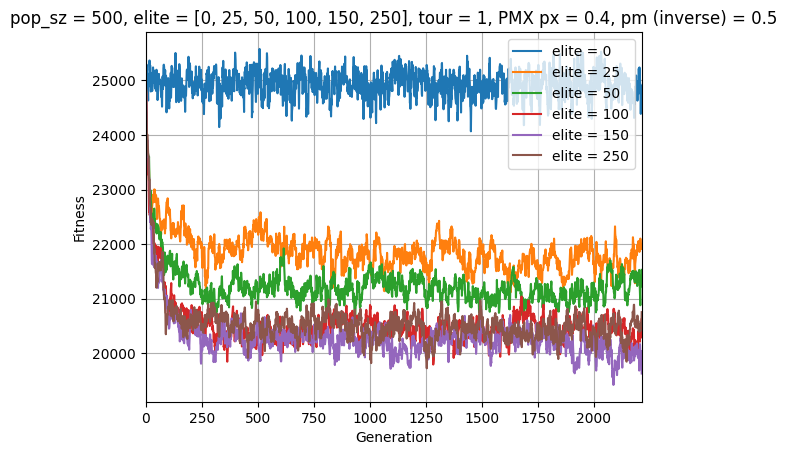

In [9]:
averaged_res_path = '../simulation_results/berlin52/aggregated/'
elite_sz_list = [0, 25, 50, 100, 150, 250]

gen_count_list = []
for param in elite_sz_list:
    filename = f'p500_esz{param}_tsz1_pxp-0.4_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'elite = {param}')
    gen_count_list.append(len(df['generation']))

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right')
plt.title(f'pop_sz = 500, elite = {elite_sz_list}, tour = 1, PMX px = 0.4, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))

#### Tour 1% - elite tuning (berlin52)

(0.0, 2213.0)

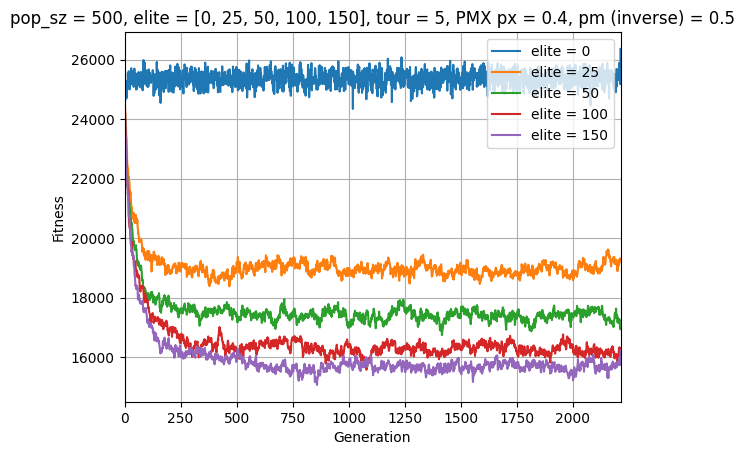

In [10]:
averaged_res_path = '../simulation_results/berlin52/aggregated/'
elite_sz_list = [0, 25, 50, 100, 150]

gen_count_list = []
for param in elite_sz_list:
    filename = f'p500_esz{param}_tsz5_pxp-0.4_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'elite = {param}')
    gen_count_list.append(len(df['generation']))

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right')
plt.title(f'pop_sz = 500, elite = {elite_sz_list}, tour = 5, PMX px = 0.4, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))

Zwiększanie ilości elity zwiększa efektywność metody. Wartość tour na poziomie 1% całej populacji wydaje się być zbyt niska.

#### Tour 10% - elite tuning (berlin52)

[]

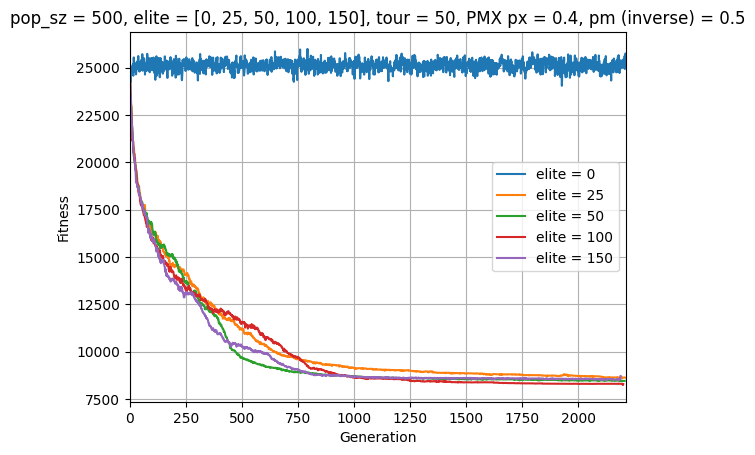

In [11]:
averaged_res_path = '../simulation_results/berlin52/aggregated/'
elite_sz_list = [0, 25, 50, 100, 150]

dfs = []
gen_count_list = []
for param in elite_sz_list:
    filename = f'p500_esz{param}_tsz50_pxp-0.4_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 1, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'elite = {param}')
    gen_count_list.append(len(df['generation']))
    dfs.append(df)

# combined_dfs = pd.concat(dfs)
# std = combined_dfs.groupby('generation')['mean'].std()
# print(std.shape)
# print(std)
# plt.plot(std.index, std, '--', label='std')

# plt.axhline(y=optimal['berlin52'], color='r', linestyle='--', label='optimal')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='right')
plt.title(f'pop_sz = 500, elite = {elite_sz_list}, tour = 50, PMX px = 0.4, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))
# plt.ylim(7800, 9000)

plt.plot()

Dla rozmiaru turnieju *tour = 1% * pop_sz* najlepsze wyniki daje *elite > 20% * pop_sz*. Z kolei ustalenie parametrów zarówno *elite* jak i *tour* na poziomie 10% populacji dało ogólnie lepsze wyniki. Wniosek - najlepiej te parametry zbalansować, niż ustawiać je na wzajemnie skrajnych wartościach.

## Wpływ pop_sz dla najlepiej zapowiadających się parametrów (do tego momentu testów) - (berlin52)

[]

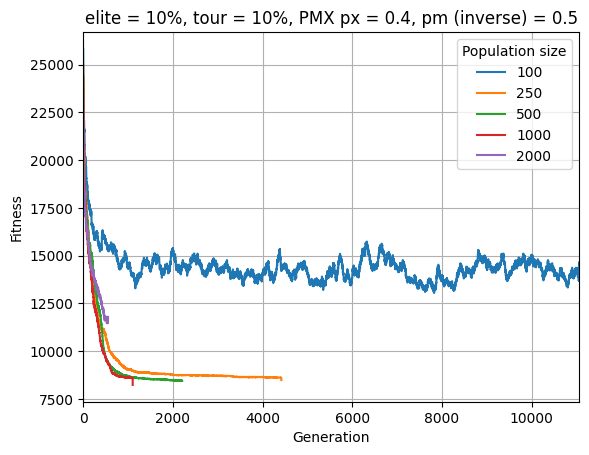

In [12]:
averaged_res_path = '../simulation_results/berlin52/aggregated/'
pop_sz_list = [100, 250, 500, 1000, 2000]

gen_count_list = []
for param in pop_sz_list:
    filename = f'p{param}_esz{param // 10}_tsz{param // 10}_pxp-0.4_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 1, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'{param}')
    gen_count_list.append(len(df['generation']))

# plt.axhline(y=optimal['berlin52'], color='r', linestyle='--', label='optimal')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right', title='Population size')
plt.title(f'elite = 10%, tour = 10%, PMX px = 0.4, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))
# plt.ylim(7500, 12500)

plt.plot()

W tym teście najlepsze rezultaty osiągnięte zostały przy populacjach wynoszących ok. 10 * loc_size (liczba lokacji). Wyższe wartości powodowały znaczne spowolnienie działania algorytmu, bez znaczącej poprawy wyników. Warunkiem przerwania dalszych obliczeń było 10,000,000 przeliczeń funkcji prrzystosowania (fitness).

In [27]:
import glob
from tabulate import tabulate

file_paths = glob.glob("../simulation_results/berlin52/aggregated/*agg.csv")
file_paths = sorted(file_paths)
filenames = [f'{os.path.basename(filepath).split("/")[-1].replace('_agg.csv', '')}' for filepath in file_paths]

results = []
for file, tag in zip(file_paths, filenames):
    df = pd.read_csv(
        file,
        sep=';',
        names=['generation', 'best', 'mean', 'worst']
    )

    best = df['best'].min()
    mean = df['mean'].mean()
    worst = df['worst'].max()
    std = df['mean'].std()

    results.append([tag, best, mean, worst, std])

summary_df = pd.DataFrame(results, columns=['Run Tag', 'Best', 'Mean', 'Worst', 'std']).sort_values('Best', ascending=True)

with open('berlin52_summary_table.txt', 'w') as latex_file:
    berlin52_latex_table = tabulate(summary_df, headers='keys', tablefmt='latex', showindex=False)
    latex_file.write(berlin52_latex_table)

print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════════════════════════╤══════════╤══════════╤═════════╤══════════╕
│ Run Tag                             │     Best │     Mean │   Worst │      std │
╞═════════════════════════════════════╪══════════╪══════════╪═════════╪══════════╡
│ p500_esz80_tsz80_pxo-0.4_pmi-0.5    │  7549.89 │  9136.06 │ 25573.2 │ 2009.39  │
├─────────────────────────────────────┼──────────┼──────────┼─────────┼──────────┤
│ p500_esz80_tsz80_pxo-0.2_pmi-0.5    │  7769.84 │  9011.75 │ 24978.6 │ 1780.13  │
├─────────────────────────────────────┼──────────┼──────────┼─────────┼──────────┤
│ p500_esz80_tsz80_pxo-0.6_pmi-0.5    │  7844.51 │  9622.12 │ 25229.4 │ 2251.43  │
├─────────────────────────────────────┼──────────┼──────────┼─────────┼──────────┤
│ p500_esz100_tsz50_pxp-0.4_pmi-0.5   │  7872.07 │ 10041.7  │ 25161.2 │ 2670.8   │
├─────────────────────────────────────┼──────────┼──────────┼─────────┼──────────┤
│ p400_esz80_tsz80_pxp-0.3_pmi-0.5    │  7939.4  │  9284.55 │ 25077.9 │ 2061.42  │
├───

---

## Strojenie parametrów dla większych zestawów danych

### kroA100

In [29]:
file_paths = glob.glob("../simulation_results/kroA100/aggregated/*agg.csv")
file_paths = sorted(file_paths)
filenames = [f'{os.path.basename(filepath).split("/")[-1].replace('_agg.csv', '')}' for filepath in file_paths]

results = []
for file, tag in zip(file_paths, filenames):
    df = pd.read_csv(
        file,
        sep=';',
        names=['generation', 'best', 'mean', 'worst']
    )

    best = df['best'].min()
    mean = df['mean'].mean()
    worst = df['worst'].max()
    std = df['mean'].std()

    results.append([tag, best, mean, worst, std])

summary_df = pd.DataFrame(results, columns=['Run Tag', 'Best', 'Mean', 'Worst', 'std']).sort_values('Best', ascending=True)

with open('kroA100_summary_table.txt', 'w') as file:
    latex_table = tabulate(summary_df, headers='keys', tablefmt='latex', showindex=False)
    file.write(latex_table)

print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════════════════════════╤═════════╤═════════╤═════════╤══════════╕
│ Run Tag                             │    Best │    Mean │   Worst │      std │
╞═════════════════════════════════════╪═════════╪═════════╪═════════╪══════════╡
│ p1000_esz100_tsz100_pxo-0.4_pmi-0.1 │ 22097.3 │ 32048.7 │  147206 │ 17736.4  │
├─────────────────────────────────────┼─────────┼─────────┼─────────┼──────────┤
│ p1000_esz100_tsz100_pxo-0.4_pmi-0.3 │ 22351.1 │ 37337.9 │  144601 │ 21572.4  │
├─────────────────────────────────────┼─────────┼─────────┼─────────┼──────────┤
│ p500_esz50_tsz50_pxo-0.4_pmi-0.5    │ 23511   │ 55976.4 │  149997 │ 17821.5  │
├─────────────────────────────────────┼─────────┼─────────┼─────────┼──────────┤
│ p250_esz25_tsz25_pxo-0.4_pmi-0.5    │ 23610.1 │ 53431.3 │  148573 │ 17930.2  │
├─────────────────────────────────────┼─────────┼─────────┼─────────┼──────────┤
│ p1000_esz100_tsz100_pxo-0.4_pmi-0.5 │ 25266.1 │ 65961.3 │  145874 │ 14978.8  │
├───────────────────────────

[]

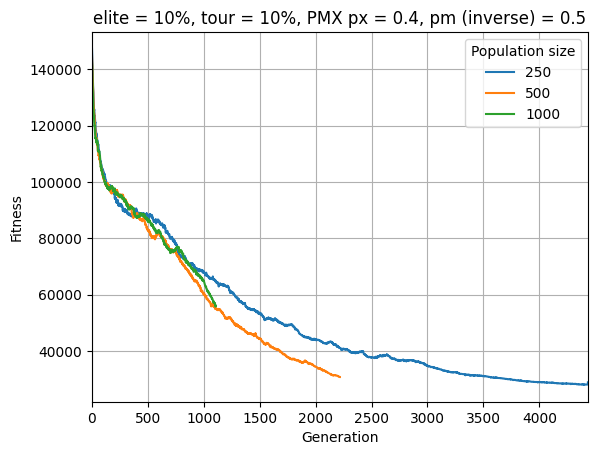

In [15]:
averaged_res_path = '../simulation_results/kroA100/aggregated/'
pop_sz_list = [250, 500, 1000]

# W trybie DEBUG:
# 846s - czas wykonania 10 symulacji dla pop_sz = 1000
# 425s - pop_sz = 500
# 250s - pop_sz = 250
# 10.49s - pop_sz = 100 

gen_count_list = []
for param in pop_sz_list:
    filename = f'p{param}_esz{param // 10}_tsz{param // 10}_pxp-0.4_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 1, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'{param}')
    gen_count_list.append(len(df['generation']))

# plt.axhline(y=optimal['kroA100'], linestyle='--', color='r', label='optimal')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right', title='Population size')
plt.title(f'elite = 10%, tour = 10%, PMX px = 0.4, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))
# plt.xlim(left=0, right=10000)
# plt.ylim(7500, 12500)

plt.plot()

[]

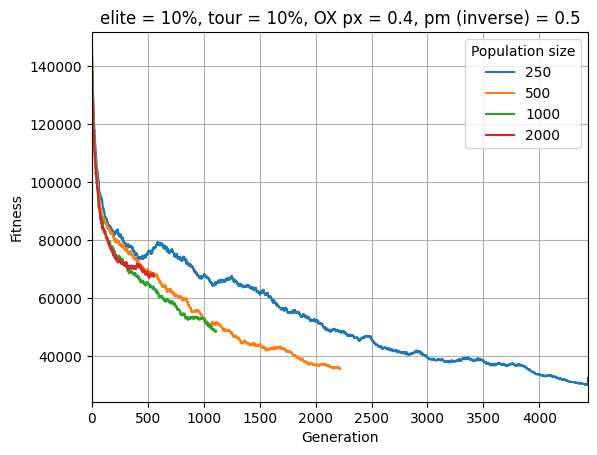

In [16]:
averaged_res_path = '../simulation_results/kroA100/aggregated/'
pop_sz_list = [250, 500, 1000, 2000]

# 388s  - czas wykonania 10 symulacji dla pop_sz = 1000
# 1209s - pop_sz = 2000
# 62s   - pop_sz = 250

gen_count_list = []
for param in pop_sz_list:
    filename = f'p{param}_esz{param // 10}_tsz{param // 10}_pxo-0.4_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 1, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'{param}')
    gen_count_list.append(len(df['generation']))

# plt.axhline(y=optimal['kroA100'], linestyle='--', color='r', label='optimal')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right', title='Population size')
plt.title(f'elite = 10%, tour = 10%, OX px = 0.4, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))
# plt.ylim(7500, 12500)

plt.plot()

In [17]:
import glob
from tabulate import tabulate

file_paths = glob.glob("../simulation_results/kroA100/aggregated/*agg.csv")
file_paths = sorted(file_paths)
filenames = [f'{os.path.basename(filepath).split("/")[-1].replace('_agg.csv', '')}' for filepath in file_paths]

results = []
for file, tag in zip(file_paths, filenames):
    df = pd.read_csv(
        file,
        sep=';',
        names=['generation', 'best', 'mean', 'worst']
    )

    best = df['best'].min()
    mean = df['best'].mean()
    worst = df['worst'].max()
    std = df['mean'].std()
    # opt_ratio = optimal['kroA100'] / best
    opt_ratio = abs(best - optimal['kroA100']) / optimal['kroA100']

    results.append([tag, best, mean, worst, std, opt_ratio])

summary_df = pd.DataFrame(results, columns=['Run Tag', 'Best', 'Mean', 'Worst', 'std', 'error ratio']).sort_values('error ratio', ascending=True)

print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════════════════════════╤═════════╤═════════╤═════════╤══════════╤═══════════════╕
│ Run Tag                             │    Best │    Mean │   Worst │      std │   error ratio │
╞═════════════════════════════════════╪═════════╪═════════╪═════════╪══════════╪═══════════════╡
│ p1000_esz100_tsz100_pxo-0.4_pmi-0.1 │ 22097.3 │ 29360.4 │  147206 │ 17736.4  │     0.0383095 │
├─────────────────────────────────────┼─────────┼─────────┼─────────┼──────────┼───────────────┤
│ p1000_esz100_tsz100_pxo-0.4_pmi-0.3 │ 22351.1 │ 33236.1 │  144601 │ 21572.4  │     0.0502357 │
├─────────────────────────────────────┼─────────┼─────────┼─────────┼──────────┼───────────────┤
│ p500_esz50_tsz50_pxo-0.4_pmi-0.5    │ 23511   │ 39234.8 │  149997 │ 17821.5  │     0.104736  │
├─────────────────────────────────────┼─────────┼─────────┼─────────┼──────────┼───────────────┤
│ p250_esz25_tsz25_pxo-0.4_pmi-0.5    │ 23610.1 │ 37810.7 │  148573 │ 17930.2  │     0.109395  │
├─────────────────────────────

Z powyższej tabeli można wywnioskować, że przy zachowaniu parametrów, lepsze wyniki daje zastosowanie operatora PMX, natomiast zwięsza niestabilność algorytmu (zwiększa się wtedy odchylenie standardowe, liczone dla wartości uśrednionych z 10 uruchomień). Populacja równa ilości lokacji dla operatora PMX uzyskała niespodziewanie dobry rezultat, przy bardzo szybkim przebiegu algorytmu (10.49s). Zwiększenie populacji do 2000 osobników nie przyniosło spodziewanych rezultatów, a wydłużyło wykonanie algorytmu do **20 minut**.
Parametr **ratio** wskazuje jak daleko od optimuum był uzyskany wynik (*(best - optimal) / optimal*). Im mniejszy tym lepiej.

Zwiększenie prawdopodobieństwa mutacji (*pm*) do wartości 0.5 pogorszyło wynik.
Lepszym operatorem mutacji okazuje się *Inverse*.

---

## kroA150

[]

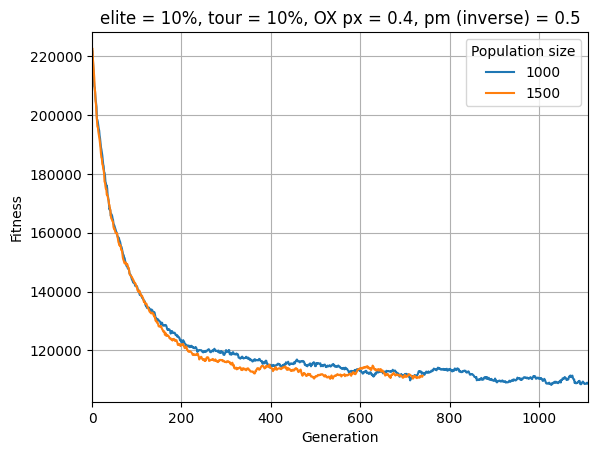

In [18]:
averaged_res_path = '../simulation_results/kroA150/aggregated/'
pop_sz_list = [1000, 1500]

# 581s - pop_sz = 800
# 834s - pop_sz = 1000
# 780s - pop_sz = 1500

gen_count_list = []
for param in pop_sz_list:
    filename = f'p{param}_esz{param // 10}_tsz{param // 10}_pxo-0.4_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 1, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'{param}')
    gen_count_list.append(len(df['generation']))

# plt.axhline(y=optimal['berlin52'], linestyle='--', color='r', label=f'optimal={optimal['kroA100']}')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right', title='Population size')
plt.title(f'elite = 10%, tour = 10%, OX px = 0.4, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))
# plt.xlim(left=0)
# plt.ylim(7500, 12500)

plt.plot()

In [19]:
file_paths = glob.glob('../simulation_results/kroA150/aggregated/*agg.csv')
filenames = [f'{os.path.basename(filepath).split("/")[-1].replace('_agg.csv', '')}' for filepath in file_paths]

results = []
for file, tag in zip(file_paths, filenames):
    df = pd.read_csv(
        file,
        sep=';',
        names=['generation', 'best', 'mean', 'worst']
    )

    best = df['best'].min()
    mean = df['best'].mean()
    worst = df['worst'].max()
    std = df['mean'].std()

    # opt_ratio = abs(best - optimal['kroA150']) / optimal['kroA150']

    results.append([tag, best, mean, worst, std])

summary_df = pd.DataFrame(results, columns=['Run Tag', 'Best', 'Mean', 'Worst', 'std']).sort_values('Best', ascending=True)

print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════════════════════════╤═════════╤══════════╤═════════╤═════════╕
│ Run Tag                             │    Best │     Mean │   Worst │     std │
╞═════════════════════════════════════╪═════════╪══════════╪═════════╪═════════╡
│ p800_esz80_tsz80_pxo-0.4_pmi-0.5    │ 45301.7 │  90563.8 │  224815 │ 17740   │
├─────────────────────────────────────┼─────────┼──────────┼─────────┼─────────┤
│ p1000_esz100_tsz100_pxo-0.4_pmi-0.5 │ 94319.3 │ 112707   │  225758 │ 17438   │
├─────────────────────────────────────┼─────────┼──────────┼─────────┼─────────┤
│ p1500_esz150_tsz150_pxo-0.4_pmi-0.5 │ 96806.1 │ 114887   │  225339 │ 20113.5 │
╘═════════════════════════════════════╧═════════╧══════════╧═════════╧═════════╛


---

Poniższe symulacje wykonywane są dla maksymalnej ilości przeliczeń funkcji przystosowania równej 2 000 000.

## fl417

[]

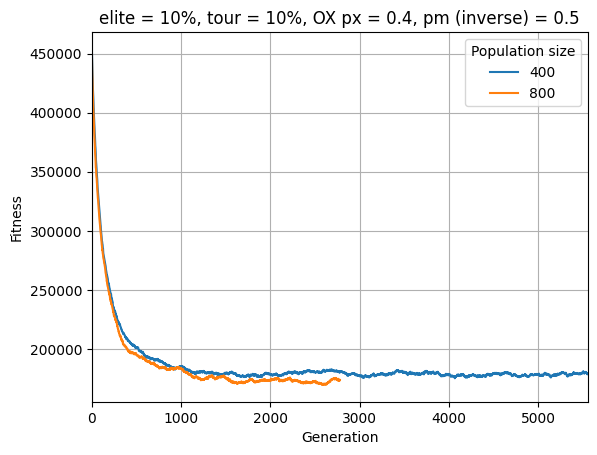

In [20]:
averaged_res_path = '../simulation_results/fl417/aggregated/'
pop_sz_list = [400, 800]

gen_count_list = []
for param in pop_sz_list:
    filename = f'p{param}_esz{param // 10}_tsz{param // 10}_pxo-0.4_pmi-0.5_agg.csv'
    df = pd.read_csv(averaged_res_path + filename,
                     sep=';',
                     usecols=[0, 1, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'{param}')
    gen_count_list.append(len(df['generation']))

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right', title='Population size')
plt.title(f'elite = 10%, tour = 10%, OX px = 0.4, pm (inverse) = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))

plt.plot()

In [21]:
file_paths = glob.glob('../simulation_results/fl417/aggregated/*agg.csv')
filenames = [f'{os.path.basename(filepath).split("/")[-1].replace('_agg.csv', '')}' for filepath in file_paths]

# p800 -> 428s
# p500 -> 280s

results = []
for file, tag in zip(file_paths, filenames):
    df = pd.read_csv(
        file,
        sep=';',
        names=['generation', 'best', 'mean', 'worst']
    )

    best = df['best'].min()
    mean = df['best'].mean()
    worst = df['worst'].max()
    std = df['mean'].std()

    results.append([tag, best, mean, worst, std])

summary_df = pd.DataFrame(results, columns=['Run Tag', 'Best', 'Mean', 'Worst', 'std']).sort_values('Best', ascending=True)

print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════════════════════════════╤════════╤════════╤═════════╤═════════╕
│ Run Tag                          │   Best │   Mean │   Worst │     std │
╞══════════════════════════════════╪════════╪════════╪═════════╪═════════╡
│ p800_esz80_tsz80_pxo-0.4_pmi-0.5 │ 147552 │ 177413 │  458730 │ 39071.8 │
├──────────────────────────────────┼────────┼────────┼─────────┼─────────┤
│ p400_esz40_tsz40_pxo-0.4_pmi-0.5 │ 156277 │ 176171 │  459857 │ 29080.8 │
╘══════════════════════════════════╧════════╧════════╧═════════╧═════════╛


---

## ali535

[]

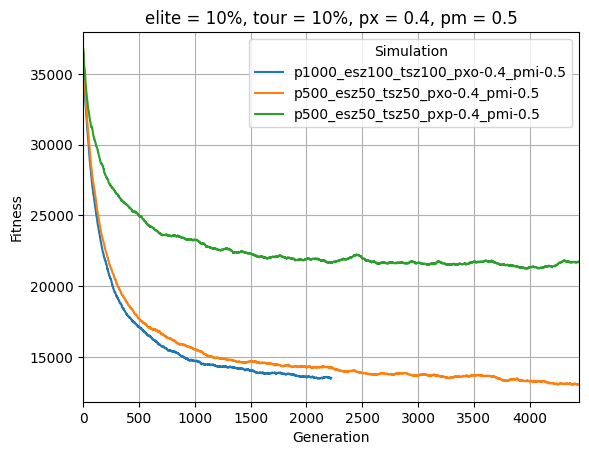

In [22]:
gen_count_list = []
file_paths = glob.glob('../simulation_results/ali535/aggregated/*agg.csv')

for f in file_paths:
    df = pd.read_csv(f,
                     sep=';',
                     usecols=[0, 1, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'{os.path.basename(f).split("/")[-1].replace('_agg.csv', '')}')
    gen_count_list.append(len(df['generation']))

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right', title='Simulation')
plt.title(f'elite = 10%, tour = 10%, px = 0.4, pm = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))

plt.plot()

In [23]:
file_paths = glob.glob('../simulation_results/ali535/aggregated/*agg.csv')
filenames = [f'{os.path.basename(filepath).split("/")[-1].replace('_agg.csv', '')}' for filepath in file_paths]

results = []
for file, tag in zip(file_paths, filenames):
    df = pd.read_csv(
        file,
        sep=';',
        names=['generation', 'best', 'mean', 'worst']
    )

    best = df['best'].min()
    mean = df['best'].mean()
    worst = df['worst'].max()
    std = df['mean'].std()

    results.append([tag + '_2m', best, mean, worst, std])

summary_df = pd.DataFrame(results, columns=['Run Tag', 'Best', 'Mean', 'Worst', 'std']).sort_values('Best', ascending=True)

print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════════════════════════════════╤═════════╤═════════╤═════════╤═════════╕
│ Run Tag                                │    Best │    Mean │   Worst │     std │
╞════════════════════════════════════════╪═════════╪═════════╪═════════╪═════════╡
│ p500_esz50_tsz50_pxo-0.4_pmi-0.5_2m    │ 11335.7 │ 14246.9 │ 37037.4 │ 3265.65 │
├────────────────────────────────────────┼─────────┼─────────┼─────────┼─────────┤
│ p1000_esz100_tsz100_pxo-0.4_pmi-0.5_2m │ 12739.2 │ 15561.5 │ 36843.3 │ 3971.63 │
├────────────────────────────────────────┼─────────┼─────────┼─────────┼─────────┤
│ p500_esz50_tsz50_pxp-0.4_pmi-0.5_2m    │ 19669.1 │ 21784.4 │ 37185.4 │ 2222.48 │
╘════════════════════════════════════════╧═════════╧═════════╧═════════╧═════════╛


[]

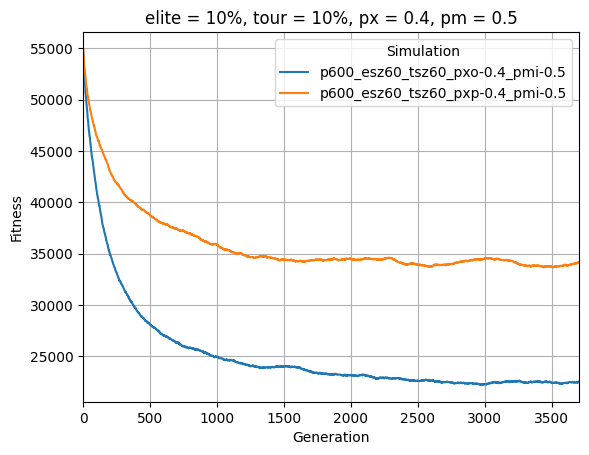

In [24]:
gen_count_list = []
file_paths = glob.glob('../simulation_results/gr666/aggregated/*agg.csv')
# filenames = [f'{os.path.basename(filepath).split("/")[-1].replace('_agg.csv', '')}' for filepath in file_paths]

for f in file_paths:
    df = pd.read_csv(f,
                     sep=';',
                     usecols=[0, 1, 2],
                     names=['generation', 'best', 'mean', 'worst'],
                     header=None
                    )
    plt.plot(df['generation'], df['mean'], label=f'{os.path.basename(f).split("/")[-1].replace('_agg.csv', '')}')
    gen_count_list.append(len(df['generation']))

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(loc='upper right', title='Simulation')
plt.title(f'elite = 10%, tour = 10%, px = 0.4, pm = 0.5')
plt.grid()
plt.xlim(0, max(gen_count_list))

plt.plot()